<a href="https://colab.research.google.com/github/JSJeong-me/KOSA-Big-Data_Vision/blob/main/Time_Series/marriots_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# check prophet version
import prophet
# print version number
print('Prophet %s' % prophet.__version__)

Prophet 1.1.3


In [2]:
# load the car sales dataset
#from pandas import read_csv
import pandas as pd


df=pd.read_excel('Total(marriot).xlsx', index_col='TS', parse_dates=True, dtype={'Value':float})
df.drop(['Unnamed: 0','Unnamed: 0.1', 'Time', 'Max Value','Date'], axis=1, inplace=True)
# summarize shape
print(df.shape)
# show first few rows
print(df.head())

(53567, 1)
                      Value
TS                         
2019-03-01 00:15:00  135.12
2019-03-01 00:30:00  131.28
2019-03-01 00:45:00  129.60
2019-03-01 01:00:00  126.48
2019-03-01 01:15:00  123.36


In [3]:
print(df.tail())

                      Value
TS                         
2020-09-08 22:45:00  157.68
2020-09-08 23:00:00  153.60
2020-09-08 23:15:00  149.04
2020-09-08 23:30:00  143.52
2020-09-08 23:45:00  139.44


In [ ]:
from matplotlib import pyplot

df.plot()
pyplot.show()

In [4]:
df_day=df.resample(rule='1H').sum()
df_day=df_day.reset_index()
#df_day.columns
df_day.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [ ]:
df_day.head()

In [ ]:
df_day.tail()

In [ ]:
df_day.describe()

In [5]:
df_day=df.resample(rule='D').sum()

In [6]:
df_day=df_day.reset_index()
#df_day.columns
df_day.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [7]:
df_day.tail()

,ds,y
553,2020-09-04,18442.08
554,2020-09-05,18112.08
555,2020-09-06,17171.28
556,2020-09-07,14864.88
557,2020-09-08,16439.76


In [8]:
from prophet import Prophet
from pandas import to_datetime


In [9]:
# prepare expected column names
df_day.columns = ['ds', 'y']
df_day['ds']= to_datetime(df_day['ds'])


In [16]:
# define the model
model = Prophet(yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True, uncertainty_samples=1000)

In [17]:
# fit the model
model.fit(df_day)

15:59:09 - cmdstanpy - INFO - Chain [1] start processing
15:59:09 - cmdstanpy - INFO - Chain [1] done processing


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Initial log joint probability = -4.39613
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes
      99       270.121    0.00413718       75.7289           1           1      120
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes
     179       270.265    0.00019681       84.1622   2.169e-06       0.001      273  LS failed, Hessian reset
     199       270.283   1.38947e-05       87.8642      0.3402           1      299
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes
     240       270.296    1.6343e-05       89.9117   1.953e-07       0.001      381  LS failed, Hessian reset
     299         270.3   4.73573e-08       74.9719      0.3914           1      455
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes
     300         270.3   8.25604e-09       74.4478      0.3522      0.3522      456
Optimization terminated normally:
  Convergence detected: absolute parameter change was below tolerance

In [19]:
from pandas import DataFrame

future = list()
for i in range(9, 15):
	date = '2020-09-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

In [20]:
# use the model to make a forecast
forecast = model.predict(future)

          ds          yhat    yhat_lower    yhat_upper
0 2020-09-09  18323.721373  16772.783460  19845.865017
1 2020-09-10  18093.754535  16569.346571  19503.306193
2 2020-09-11  18049.362313  16483.678412  19533.653983
3 2020-09-12  17835.086454  16424.530608  19301.491299
4 2020-09-13  17379.120558  15857.961715  18870.400897


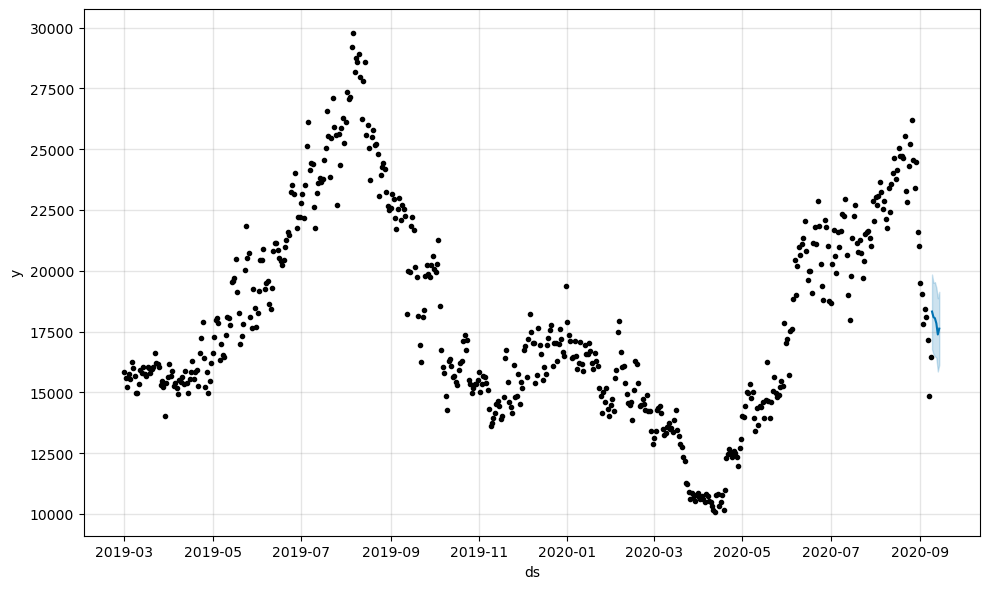

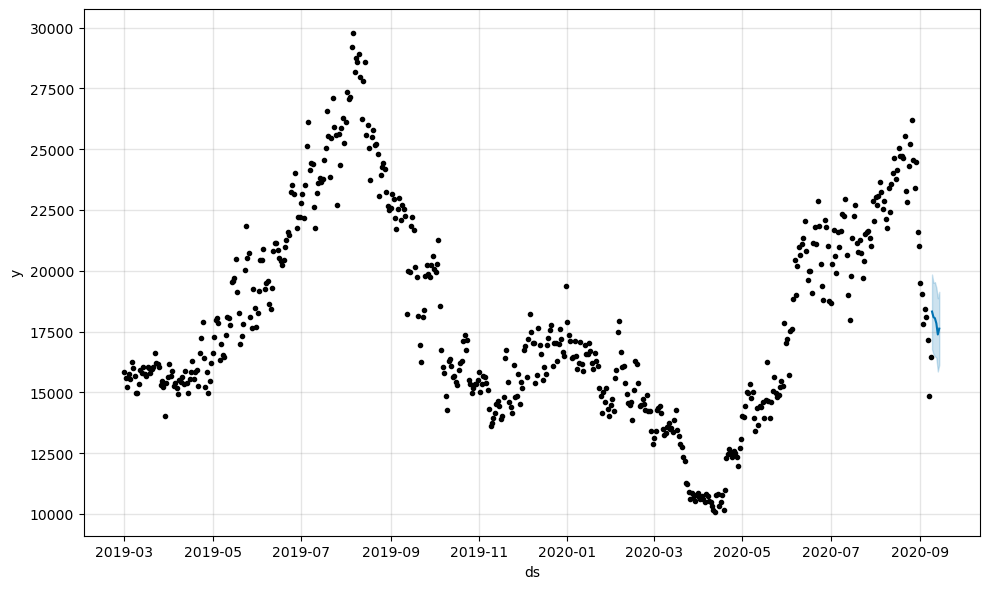

In [21]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
#pyplot.show()

In [22]:
from sklearn.metrics import mean_absolute_error
#from matplotlib import pyplot

train = df_day.drop(df_day.index[-7:])

ModuleNotFoundError: No module named 'sklearn'